In [4]:
import numpy as np

In [5]:
from matplotlib import pyplot as plt


In [608]:
class kmeans_cluster:
    
    def __init__(self,dataset,centres):
        dataset1 = np.random.uniform(-1,1,100)
        dataset1 = np.c_[dataset1]

        dataset2 = np.random.uniform(-0.5,1.5,100)
        dataset2 = np.c_[dataset2]
        
        dataset3 = np.random.uniform(1,2,100)
        dataset3 = np.c_[dataset3]
        
        
        self.centres = [dataset1.mean(),dataset2.mean()]
#         self.centres = [0,1]

        self.dataset = np.vstack([dataset1,dataset2,dataset3])
    
    
    
    def kmeans(self,dataset,prev_centres,centres):
        
        while all(prev_centres != centres):
            
            cluster_set = {key: np.array([0]) for key in range(len(centres))}
            for pt in dataset:
                
                dist = np.linalg.norm(pt - np.c_[centres],axis=1)
                mindist_ind = np.argmin(dist)
                
                temp = cluster_set[mindist_ind]
                cluster_set[mindist_ind] = np.hstack([temp,pt])
               
            
            for c in range(len(centres)):
                temp = cluster_set[c]
                cluster_set[c] = temp[1:]
            
            
            for i in range(len(centres)):
                if(len(cluster_set[i]) > 0):
                    prev_centres[i] = centres[i]
                    temp = cluster_set[i]
                    temp = temp.mean()
                    centres[i] = temp
                    
                    
                else:
                    prev_centres[i] = centres[i]
                  
    
    
    def find_clusters(self,dataset,centres):
            cluster_set = {key: np.array([0]) for key in range(len(centres))}
            for pt in dataset:
                
                dist = np.linalg.norm(pt - np.c_[centres],axis=1)
                mindist_ind = np.argmin(dist)
                
                temp = cluster_set[mindist_ind]
                cluster_set[mindist_ind] = np.hstack([temp,pt])
               
            
            for c in range(len(centres)):
                temp = cluster_set[c]
                cluster_set[c] = temp[1:]
          
            return cluster_set
    
    def plotpoints(self,cluster_dict,centres):
        temp = 0
        for x in range(len(centres)):
            temp += 1
            plt.plot(cluster_dict[x],temp + np.zeros((len(cluster_dict[x]))),'o')
            plt.plot(centres[x],np.ones((1)),'*')
#         print(len(cluster_dict[centres[0]]))
#         plt.plot(cluster_dict[0],1+np.zeros((len(cluster_dict[0]))),'o')
#         plt.plot(cluster_dict[1],2+np.zeros((len(cluster_dict[1]))),'o')
# #         plt.plot(cluster_dict[centres[2]],3+np.zeros((len(cluster_dict[centres[2]]))),'o')

#         plt.plot(centres,np.ones(len(centres)),'*')
        
    

In [609]:
t = kmeans_cluster(dataset,centres)

In [610]:
prev_centres = np.full((len(t.centres)),float('inf'))

In [611]:
t.kmeans(t.dataset,prev_centres,t.centres)

In [612]:
t.centres

[-0.06974226309380839, 1.240700099676885]

In [613]:
clusters = t.find_clusters(t.dataset,t.centres)

In [614]:
len(clusters[1])

173

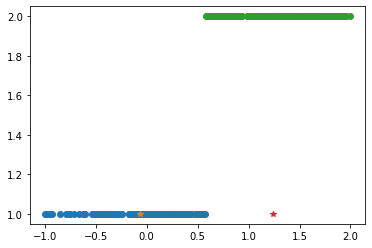

In [615]:
t.plotpoints(clusters,t.centres)